# **Assignment02 : Customer Segmentation**

> บล็อกที่มีการเยื้อง



# **Load Dependencies**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 113 kB 55.2 MB/s 
     |████████████████████████████████| 6.8 MB 38.7 MB/s 
     |████████████████████████████████| 1.3 MB 14.8 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 261 kB 55.0 MB/s 
     |████████████████████████████████| 271 kB 37.9 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 80 kB 9.2 MB/s 
     |████████████████████████████████| 167 kB 46.5 MB/s 
     |████████████████████████████████| 2.0 MB 50.3 MB/s 
     |████████████████████████████████| 1.7 MB 45.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.1 MB 41.0 MB/s 
     |████████████████████████████████| 102 kB 11.5 MB/s 
     |██████████████████

In [9]:
import pandas as pd
from pycaret.clustering import *
import numpy as np

# **Load Data**

In [5]:
df = pd.read_csv('/content/drive/My Drive/BADS7105 CRM/Supermarket Data.csv')

In [6]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [7]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
956569  PRD0904997      CL00074     DEP00021       G00007       D00002   
956570  PRD0904997      CL00074     DEP00021       G00007       D00002   
956571  PRD0904997      CL00074     DEP00021       G00007       D00002   
956572  PRD0904997      CL00074     DEP00021       G00007       D00002   
956573  PRD0904997      CL00074     DEP00021       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
956569             NaN                    NaN            NaN  994101100088778   
956570             NaN                    NaN            NaN  994102700099738   
956571  CUST0000544241                     LA             YA  994101100506174   
956572  CUST0000423155                     LA             YF  994101300433650   
956573             NaN                    NaN            NaN  994102900104676   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
956569           M                       MM      Top Up   
956570           L                       LA      Top Up   
956571           L                       LA      Top Up   
956572           L                       LA   Full Shop   
956573           L                       MM      Top Up   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  
956569                   Fresh  STORE00002           LS          W01  
956570                   Fresh  STORE00002           LS          W01  
956571                   Fresh  STORE00002           LS          W01  
956572                   Fresh  STORE00002           LS          W01  
956573                   Fresh  STORE00002           LS          W01

In [16]:
# Add WK_DAY = Shopping on Monday - Friday (SHOP_WEEKDAY = 2 - 6)
df['WK_DAY'] = np.where(np.logical_and(df['SHOP_WEEKDAY'] >= 2,df['SHOP_WEEKDAY'] <= 6),1,0)

# Add WK_END = Shopping on Saturday - Sunday (SHOP_WEEKDAY = 7, 1)
df['WK_END'] = np.where(np.logical_or(df['SHOP_WEEKDAY'] == 1,df['SHOP_WEEKDAY'] == 7),1,0)

# Add Hour_Day = Shopping on 6.00 - 18.00
df['HOUR_DAY'] = np.where(np.logical_and(df['SHOP_HOUR'] >= 6,df['SHOP_HOUR'] <= 18),1,0)

# Add Hour_Night = Shopping on 6.00 - 18.00
df['HOUR_NIGHT'] = np.where(np.logical_or(df['SHOP_HOUR'] < 6,df['SHOP_HOUR'] > 18),1,0)


In [17]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
956569  PRD0904997      CL00074     DEP00021       G00007       D00002   
956570  PRD0904997      CL00074     DEP00021       G00007       D00002   
956571  PRD0904997      CL00074     DEP00021       G00007       D00002   
956572  PRD0904997      CL00074     DEP00021       G00007       D00002   
956573  PRD0904997      CL00074     DEP00021       G00007       D00002   

             CUST_CODE CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID  \
956569             NaN                    NaN            NaN  994101100088778   
956570             NaN                    NaN            NaN  994102700099738   
956571  CUST0000544241                     LA             YA  994101100506174   
956572  CUST0000423155                     LA             YF  994101300433650   
956573             NaN                    NaN            NaN  994102900104676   

       BASKET_SIZE BASKET_PRICE_SENSITIVITY BASKET_TYPE  \
956569           M                       MM      Top Up   
956570           L                       LA      Top Up   
956571           L                       LA      Top Up   
956572           L                       LA   Full Shop   
956573           L                       MM      Top Up   

       BASKET_DOMINANT_MISSION  STORE_CODE STORE_FORMAT STORE_REGION  WK_DAY  \
956569                   Fresh  STORE00002           LS          W01       1   
956570                   Fresh  STORE00002           LS          W01       1   
956571                   Fresh  STORE00002           LS          W01       1   
956572                   Fresh  STORE00002           LS          W01       1   
956573                   Fresh  STORE00002           LS          W01       1   

        WK_END  HOUR_DAY  HOUR_NIGHT  
956569       0         1           0  
956570       0         0           1  
956571       0         1           0  
956572       0         0           1  
956573       0         0           1

In [18]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0    

# **Prepare customer single view**

# Define features

* Total visits = COUNT(DISTINCT BASKET ID)
* Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)
* Total no. of SKUs
* Week day = % Shopping on Monday - Friday
* Week end = % Shopping on Saturday - Sunday
* Shop day = % Shopping during 6.00 - 18.00
* Shop night = % Shopping during 18.01 - 5.59

# Calculate features

In [35]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  WkDay=('WK_DAY','sum'),
                                                                                  WkEnd=('WK_END','sum'),
                                                                                  ShopDay=('HOUR_DAY','sum'),
                                                                                  ShopNight=('HOUR_NIGHT','sum')
                                                                                  ).reset_index()

In [36]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [37]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [38]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [39]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [40]:
##Shop on Weekday%
df_csv['WkDay%'] = (df_csv['WkDay'])/(df_csv['WkDay'] + df_csv['WkEnd'])

In [41]:
##Shop on DayTime%
df_csv['ShopDay%'] = (df_csv['ShopDay'])/(df_csv['ShopDay'] + df_csv['ShopNight'])

In [43]:
df_csv.head(10)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate   LastDate  \
0  CUST0000000181        2.44            1          1 2007-01-06 2007-01-06   
1  CUST0000000369      959.33          220        189 2006-04-16 2008-07-05   
2  CUST0000000689      328.57           16        116 2007-07-22 2008-06-23   
3  CUST0000000998        5.95            3          4 2006-05-04 2006-07-07   
4  CUST0000001163       39.74            4         24 2006-10-22 2008-06-22   
5  CUST0000001194     2493.83          103        403 2006-04-22 2008-06-20   
6  CUST0000002257        1.99            1          1 2006-07-21 2006-07-21   
7  CUST0000002499        0.34            1          1 2006-04-14 2006-04-14   
8  CUST0000002605        1.80            6          1 2006-10-08 2008-06-12   
9  CUST0000002637      124.63           15         53 2006-08-03 2008-05-30   

   WkDay  WkEnd  ShopDay  ShopNight  TicketSize  total_days  recency  \
0      0      1        1          0    2.440000           1      547   
1    523    176      651         48    4.360591         812        1   
2    154     31       82        103   20.535625         338       13   
3      2      2        4          0    1.983333          65      730   
4      1     24       25          0    9.935000         610       14   
5    871    327      667        531   24.211942         791       16   
6      1      0        1          0    1.990000           1      716   
7      1      0        1          0    0.340000           1      814   
8      4      2        5          1    0.300000         614       24   
9     49     36       69         16    8.308667         667       37   

     WkDay%  ShopDay%  
0  0.000000  1.000000  
1  0.748212  0.931330  
2  0.832432  0.443243  
3  0.500000  1.000000  
4  0.040000  1.000000  
5  0.727045  0.556761  
6  1.000000  1.000000  
7  1.000000  1.000000  
8  0.666667  0.833333  
9  0.576471  0.811765

# **Cluster customers**

In [44]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate','WkDay','WkEnd','ShopDay','ShopNight'], normalize=True)

Description                 Value
0                               session_id                  6813
1                            Original Data            (6100, 15)
2                           Missing Values                 False
3                         Numeric Features                     8
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data             (6100, 8)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  a1c1
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [45]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [46]:
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

# Compare model performance

In [47]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0     -0.1056           197.1317  ...           0             0

[1 rows x 6 columns]

In [48]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [49]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.6773            51.1818  ...           0             0

[1 rows x 6 columns]

In [ ]:
plot_model(sc)

# KMeans Clustering

In [66]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.3231          2282.3627  ...           0             0

[1 rows x 6 columns]

In [67]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=6813, tol=0.0001, verbose=0)


In [68]:
plot_model(kmeans)

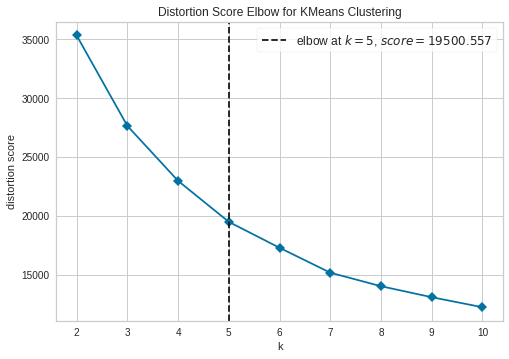

In [69]:
plot_model(kmeans, plot = 'elbow')

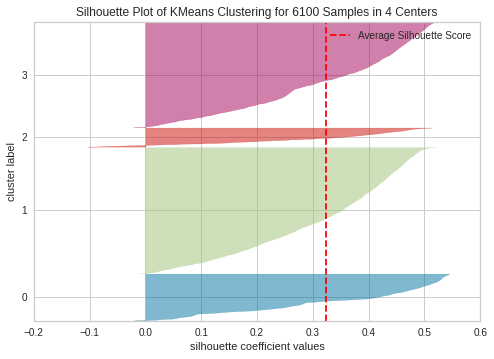

In [70]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [72]:
kmeans_results = assign_model(kmeans)
kmeans_results.head(5)

CUST_CODE  TotalSpend  TotalVisits  ...    WkDay%  ShopDay%    Cluster
0  CUST0000000181        2.44            1  ...  0.000000  1.000000  Cluster 0
1  CUST0000000369      959.33          220  ...  0.748212  0.931330  Cluster 2
2  CUST0000000689      328.57           16  ...  0.832432  0.443243  Cluster 1
3  CUST0000000998        5.95            3  ...  0.500000  1.000000  Cluster 0
4  CUST0000001163       39.74            4  ...  0.040000  1.000000  Cluster 1

[5 rows x 16 columns]

In [77]:
def class_convert(cl):
    if cl == 'Cluster 0':
        return 0
    if cl == 'Cluster 1':
        return 1
    if cl == 'Cluster 2':
        return 2
    if cl == 'Cluster 3':
        return 3

kmeans_results['Cluster'] = kmeans_results['Cluster'].apply(class_convert)

In [78]:
kmeans_results.head(5)

CUST_CODE  TotalSpend  TotalVisits  ...    WkDay%  ShopDay% Cluster
0  CUST0000000181        2.44            1  ...  0.000000  1.000000       0
1  CUST0000000369      959.33          220  ...  0.748212  0.931330       2
2  CUST0000000689      328.57           16  ...  0.832432  0.443243       1
3  CUST0000000998        5.95            3  ...  0.500000  1.000000       0
4  CUST0000001163       39.74            4  ...  0.040000  1.000000       1

[5 rows x 16 columns]

In [125]:
#Decision Tree

from sklearn import tree

# X = kmeans_results[['TotalSpend','TotalVisits','TotalSKUs','TicketSize','recency','WkDay%','ShopDay%']]
X = kmeans_results[['TotalSpend','TotalVisits','TicketSize','recency','WkDay%','ShopDay%']]
print(X.head())

y = kmeans_results[['Cluster']]
print(y.head())

   TotalSpend  TotalVisits  TicketSize  recency    WkDay%  ShopDay%
0        2.44            1    2.440000      547  0.000000  1.000000
1      959.33          220    4.360591        1  0.748212  0.931330
2      328.57           16   20.535625       13  0.832432  0.443243
3        5.95            3    1.983333      730  0.500000  1.000000
4       39.74            4    9.935000       14  0.040000  1.000000
   Cluster
0        0
1        2
2        1
3        0
4        1


In [128]:
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

In [117]:
import graphviz 

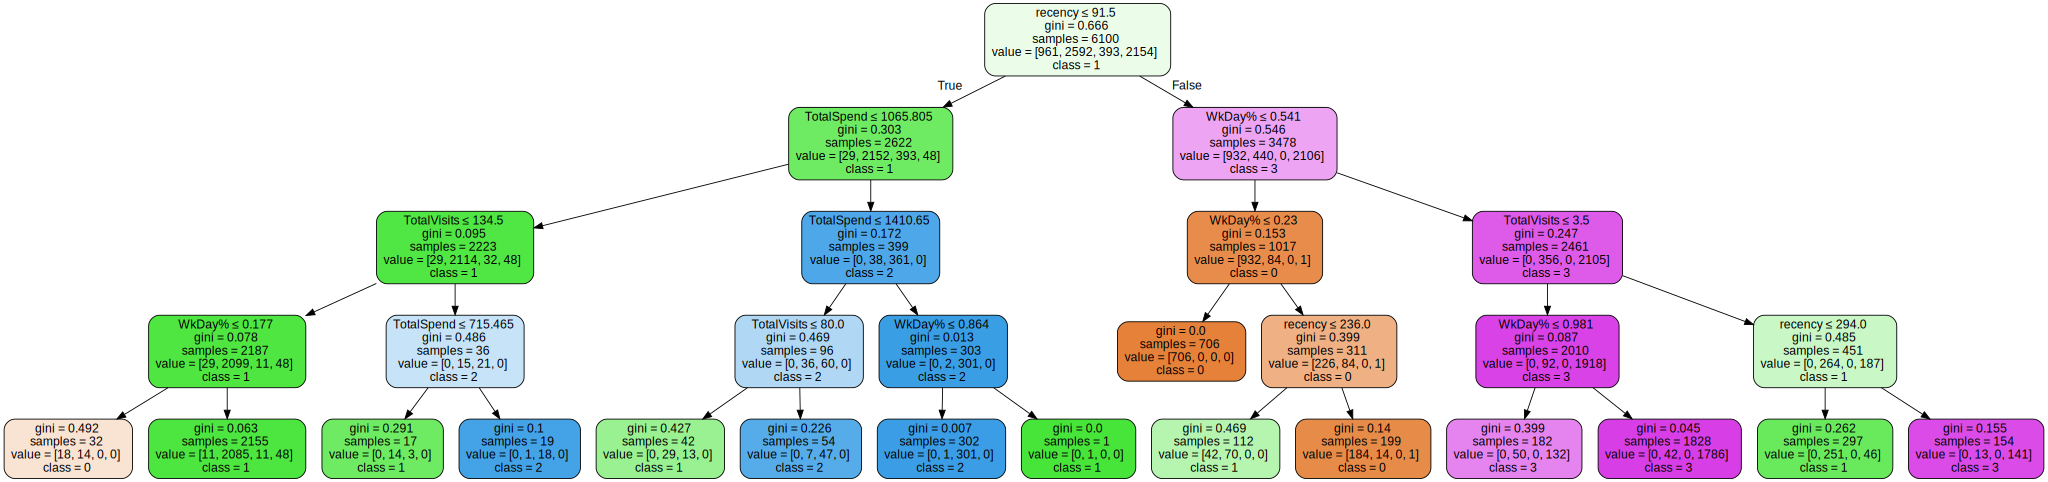

In [129]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                # feature_names=['TotalSpend','TotalVisits','TotalSKUs','TicketSize','recency','WkDay%','ShopDay%'],
                                feature_names=['TotalSpend','TotalVisits','TicketSize','recency','WkDay%','ShopDay%'],
                                class_names='0123',
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph   

In [132]:
# Total Distribution
plot_model(kmeans, plot = 'distribution',scale = 0.5)

In [142]:
'''TotalSpend
Cluster 2 is our top spender with average 2000$/customer
Cluster 1 is the second one with average 80$/customer which is relatively low
Cluster 0 and Cluster 3 seems not much spending with our shops.'''

plot_model(kmeans, plot = 'distribution',feature = 'TotalSpend')

In [138]:
'''recency
Cluster 2 is very active customer. They have the average recency just 19 days.
Cluster 1 is also active with the average recency just 34 days.
Cluster 0 and Cluster 3 seems not engaged with our businees more than a year.'''

plot_model(kmeans, plot = 'distribution',feature = 'recency')

In [140]:
'''TicketSize
Cluster 2 has the maximum average ticket size with 15.8$/basket
Cluster 1 is the second best with 7.2$/basket
Cluster 0 and Cluster 3 has low ticket size but still has outlier with around 100$/basket'''

plot_model(kmeans, plot = 'distribution',feature = 'TicketSize')

In [144]:
''''WkDay%
Cluster 0 comes visiting us in weekends while other clusters prefer to visit us mainly during weekdays'''

plot_model(kmeans, plot = 'distribution',feature = 'WkDay%')

In [146]:
''''ShopDay%
Cluster 1 and 2 are mainly visiting us during day time (6.00 - 18.00) while the others has no significant diference for the tim visiting.'''

plot_model(kmeans, plot = 'distribution',feature = 'ShopDay%')

# **Summarizarion**






Cluster0 : Weekends Light Shoppers

> We have the customer in this group around 15%. They spend quite low and not often visit our shop. However, the characteristic of this group is the will come almost only in weekend. It's great opportunity for our shop to increase revenue and profit by add new stuff in the weekends selling which may not our strength right now to engage more for this group of customers.กที่มีการเยื้อง



Cluster1 : Backbone Customers

> We have the customer in this group around 40% which is the majority of our current customers. They are engaged with average 34 days recency. They spend not much around 80 USD/customer and 7.2 USD/basket. However, due to their volume, this group of customers get us around 40% of our revenue. Therefore, we should launch the promotion to upselling this group of customers with more premium grade product. We can offer the 0% fee installment payment to encourage their spending in order to gain more and more profit.  


Cluster2 : Premium Customers

> They are rich!!! They spend a lot!!! They win in any aspect!!! We have the customer in this group around 10% which is the least in term of quantity. However, ther are our real treasure and luckily that they are the most active spendors, they come to our shop atleast every 2 weeks. They spend around 2000 USD/customer and 15.8 USD/basket. We gain 50% revenue from this group of customer. We have to do every thing to maintain and increase the portion of this customer's group. We'll launch campaign "Friend Inviting" in order to gain more new customers like them. We'll try to cross-selling the other high-end product that they might interest based on the product reconmendation system. We hope that we can increase the portion of this group to 20% by next year.


Cluster3 : Weekends Light Shoppers

> We have the customer in this group around 35%. They spend quite low and not often visit our shop. However, there are some outliers who spend more than 100 USD in this group. First, whe should filter the potential customer in this group and launch the "come-back" campaign in order to bring back them to be our active customers. We should also reconsider the product and pricing since it seems that they were our customers in the past. Are our prices competitive with other store? We have to think of this again to regain this group of customers back. 